# Proyek Analisis Data: Nama dataset
- Nama: Amrina Rosyada
- Email:amrinarosyada778@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- Apakah korelasi antara setiap parameter yang menentukan kualitas udara polusi
- stasiun dengan tingkat polusi tertinggi di 2017

## Menyiapkan semua library yang dibuthkan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.impute import SimpleImputer
%matplotlib inline

## Data Wrangling

### Gathering Data

In [2]:
#memanggil semua dataset yang ada dan menyimpannya pada sebuah variabel df_namastation
df_aotizhongxin = pd.read_csv(r"C:\Users\AMRINA\OneDrive\Documents\iseng\AnalisisData\Air-quality-dataset\PRSA_Data_20130301-20170228\PRSA_Data_Aotizhongxin_20130301-20170228.csv")
df_changping = pd.read_csv(r"C:\Users\AMRINA\OneDrive\Documents\iseng\AnalisisData\Air-quality-dataset\PRSA_Data_20130301-20170228\PRSA_Data_Changping_20130301-20170228.csv")
df_dingling = pd.read_csv(r"C:\Users\AMRINA\OneDrive\Documents\iseng\AnalisisData\Air-quality-dataset\PRSA_Data_20130301-20170228\PRSA_Data_Dingling_20130301-20170228.csv")
df_dongshi = pd.read_csv(r"C:\Users\AMRINA\OneDrive\Documents\iseng\AnalisisData\Air-quality-dataset\PRSA_Data_20130301-20170228\PRSA_Data_Dongsi_20130301-20170228.csv")
df_guanyuan = pd.read_csv(r"C:\Users\AMRINA\OneDrive\Documents\iseng\AnalisisData\Air-quality-dataset\PRSA_Data_20130301-20170228\PRSA_Data_Guanyuan_20130301-20170228.csv")
df_gucheng = pd.read_csv(r"C:\Users\AMRINA\OneDrive\Documents\iseng\AnalisisData\Air-quality-dataset\PRSA_Data_20130301-20170228\PRSA_Data_Gucheng_20130301-20170228.csv")
df_huairou = pd.read_csv(r"C:\Users\AMRINA\OneDrive\Documents\iseng\AnalisisData\Air-quality-dataset\PRSA_Data_20130301-20170228\PRSA_Data_Huairou_20130301-20170228.csv")
df_nongzhanguan = pd.read_csv(r"C:\Users\AMRINA\OneDrive\Documents\iseng\AnalisisData\Air-quality-dataset\PRSA_Data_20130301-20170228\PRSA_Data_Nongzhanguan_20130301-20170228.csv")
df_shunyi = pd.read_csv(r"C:\Users\AMRINA\OneDrive\Documents\iseng\AnalisisData\Air-quality-dataset\PRSA_Data_20130301-20170228\PRSA_Data_Shunyi_20130301-20170228.csv")
df_tiantan = pd.read_csv(r"C:\Users\AMRINA\OneDrive\Documents\iseng\AnalisisData\Air-quality-dataset\PRSA_Data_20130301-20170228\PRSA_Data_Tiantan_20130301-20170228.csv")
df_wanliu = pd.read_csv(r"C:\Users\AMRINA\OneDrive\Documents\iseng\AnalisisData\Air-quality-dataset\PRSA_Data_20130301-20170228\PRSA_Data_Wanliu_20130301-20170228.csv")
df_wanshouxigong = pd.read_csv(r"C:\Users\AMRINA\OneDrive\Documents\iseng\AnalisisData\Air-quality-dataset\PRSA_Data_20130301-20170228\PRSA_Data_Wanshouxigong_20130301-20170228.csv")

In [3]:
#mendisplay dataset aotizhongxin agar terlihat bentuk datanya
df_aotizhongxin.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [4]:
#mendisplay dataset aotizhongxin agar terlihat bentuk datanya
df_wanshouxigong.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


In [5]:
#menggabungkan semua dataset dalam satu dataframe menggunakan concat, dan menyimpannya pada variabel dfs
dfs = pd.concat([df_aotizhongxin, df_changping, df_dingling, df_dongshi, df_guanyuan, df_gucheng, df_huairou, df_nongzhanguan, df_shunyi, df_tiantan, df_wanliu, df_wanshouxigong])
dfs

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [6]:
#menampilkan info dataset
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


### Assessing Data

In [7]:
#mencari apakah ada data yang terduplicated dan berapa jumlahnya
dfs.duplicated().sum()

0

In [8]:
#mencari data missing value dan berapa jumlahnya
dfs.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

### Cleaning Data

In [9]:
# Create an instance of SimpleImputer with strategy='most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation to fill missing values in the DataFrame
dfs = pd.DataFrame(imputer.fit_transform(dfs), columns=dfs.columns)

In [10]:
#menampilkan kembali apakah masih ada missing value
dfs.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [11]:
dfs.dropna()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
dfs.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768,420768,420768,420768,420768,420768.0,420768.0,420768.0,420768.0,420768.0,420768.0,420768.0,420768.0,420768.0,420768.0,420768,420768.0,420768
unique,35064,5,12,31,24,888.0,1084.0,691.0,1212.0,132.0,1598.0,2034.0,726.0,645.0,253.0,16,117.0,12
top,1,2016,3,1,0,3.0,6.0,2.0,16.0,300.0,2.0,3.0,1019.0,17.6,0.0,NE,1.1,Aotizhongxin
freq,12,105408,35712,13824,17532,17549.0,11394.0,107578.0,17915.0,53009.0,55604.0,3812.0,3341.0,1962.0,404248.0,45157,22567.0,35064


# Pollutants
Particulate matter (PM)
PM is a common proxy indicator for air pollution. There is strong evidence for the negative health impacts associated with exposure to this pollutant. The major components of PM are sulfates, nitrates, ammonia, sodium chloride, black carbon, mineral dust and water.

Carbon monoxide (CO)
Carbon monoxide is a colourless, odourless and tasteless toxic gas produced by the incomplete combustion of carbonaceous fuels such as wood, petrol, charcoal, natural gas and kerosene.

Ozone (O3)
Ozone at ground level – not to be confused with the ozone layer in the upper atmosphere – is one of the major constituents of photochemical smog and it is formed through the reaction with gases in the presence of sunlight.

Nitrogen dioxide (NO2)
NO2 is a gas that is commonly released from the combustion of fuels in the transportation and industrial sectors.

Sulfur dioxide (SO2)
SO2 is a colourless gas with a sharp odour. It is produced from the burning of fossil fuels (coal and oil) and the smelting of mineral ores that contain sulfur.

In [13]:
#mendisplay tahun yang memiliki kadar PM2.5 tertinggi
df = dfs[['PM2.5','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
df

C:\Users\AMRINA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.median is deprecated. In a future version, a TypeError will be raised. Before calling .median, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


,year,PM2.5
4,2017,44.0
3,2016,47.0
2,2015,50.0
1,2014,60.0
0,2013,58.0


In [14]:
#mendisplay tahun yang memiliki kadar PM10 tertinggi
df = dfs[['PM10','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
df

C:\Users\AMRINA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.median is deprecated. In a future version, a TypeError will be raised. Before calling .median, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


,year,PM10
4,2017,66.0
3,2016,71.0
2,2015,76.0
1,2014,93.0
0,2013,86.0


In [15]:
#mendisplay tahun yang memiliki kadar SO2 tertinggi
df = dfs[['SO2','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
df

C:\Users\AMRINA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.median is deprecated. In a future version, a TypeError will be raised. Before calling .median, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


,year,SO2
4,2017,12.0000
3,2016,4.0000
2,2015,6.0000
1,2014,9.0000
0,2013,10.8528


In [16]:
#mendisplay tahun yang memiliki kadar NO2 tertinggi
df = dfs[['NO2','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
df

C:\Users\AMRINA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.median is deprecated. In a future version, a TypeError will be raised. Before calling .median, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


,year,NO2
4,2017,50.0
3,2016,37.0
2,2015,39.0
1,2014,45.0
0,2013,46.0


In [17]:
#mendisplay tahun yang memiliki kadar CO tertinggi
df = dfs[['CO','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
df

C:\Users\AMRINA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.median is deprecated. In a future version, a TypeError will be raised. Before calling .median, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


,year,CO
4,2017,800.0
3,2016,800.0
2,2015,800.0
1,2014,900.0
0,2013,800.0


In [19]:
#mendisplay tahun yang memiliki kadar O3 terendah
df = dfs[['O3','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
df

C:\Users\AMRINA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.median is deprecated. In a future version, a TypeError will be raised. Before calling .median, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


,year,O3
4,2017,36.0
3,2016,44.0
2,2015,45.0
1,2014,41.0
0,2013,42.0


## Visualization & Explanatory Analysis

### Pertanyaan 1: 

NaN values in the subset DataFrame:
PM2.5    0
PM10     0
NO2      0
SO2      0
CO       0
O3       0
dtype: int64
Correlation Matrix:
          PM2.5      PM10       NO2       SO2        CO        O3
PM2.5  1.000000  0.878638  0.656736  0.479171  0.758542 -0.138580
PM10   0.878638  1.000000  0.645964  0.460892  0.681688 -0.098423
NO2    0.656736  0.645964  1.000000  0.490435  0.681647 -0.442435
SO2    0.479171  0.460892  0.490435  1.000000  0.518972 -0.154633
CO     0.758542  0.681688  0.681647  0.518972  1.000000 -0.284965
O3    -0.138580 -0.098423 -0.442435 -0.154633 -0.284965  1.000000


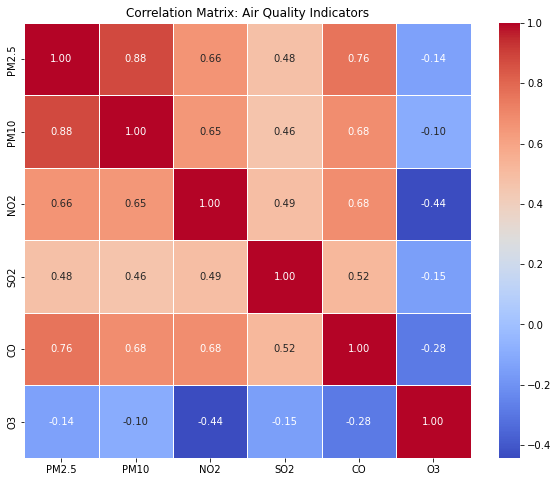

In [20]:
# Select specific air quality indicator columns
columns_of_interest = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']

# Create a subset DataFrame with the selected columns
df_subset = dfs[columns_of_interest]

# Check for NaN values in the subset DataFrame
print("NaN values in the subset DataFrame:")
print(df_subset.isnull().sum())

# Fill NaN values with zeros (or choose another method based on your needs)
df_subset = df_subset.fillna(0)

# Calculate correlation matrix
correlation_matrix = df_subset.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix: Air Quality Indicators')
plt.show()

### Pertanyaan 2: 

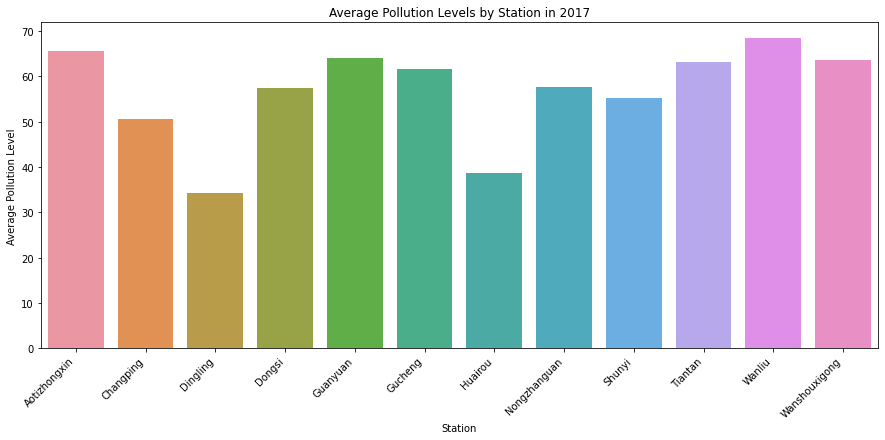

In [21]:
# Kolom-kolom yang ingin diplot
columns_to_plot = ['NO2', 'SO2', 'PM10', 'O3', 'CO']

# Menggunakan data hanya untuk tahun 2017
df_2017 = dfs[dfs['year'] == 2017]

# Plotting bar plot untuk setiap stasiun dan parameter
plt.figure(figsize=(15, 6))
sns.barplot(x='station', y='NO2', data=df_2017, ci=None)
plt.title('Average Pollution Levels by Station in 2017')
plt.ylabel('Average Pollution Level')
plt.xlabel('Station')
plt.xticks(rotation=45, ha='right')
plt.show()

## Conclusion

- Conclution pertanyaan 1
    1. PM10 terkait dengan PM2.5, ini diharapkan karena keduanya merupakan partikel
    2. CO, NOx dan NO2 saling berkaitan
    3. Ketika kadar CO dan NO2 tinggi, maka kadar O3 kecil
- conclution pertanyaan 2
 Stasiun dengan kadar polusi tertinggi yang terjadi pada tahun 2017 adalah stasiun wanliu